In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
df_merged_large = pd.read_pickle(r'C:\Users\charan.lalwani\Documents\cf\Achievement 4\Instacart basket analysis\02 Data\Prepared data\customer_prods_ords_merged.pkl') 

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [3]:
df_merged_large.head()

,user_id,first_name,surname,Gender,state,age,date_joined,no.of dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,Spending_Flag,median_days_since_prior_order,order_frequency_flag,merge_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both


### Droppinf first_name and surname because of PII

In [4]:
df_merged_large.shape

(32404859, 35)

In [5]:
df = df_merged_large.drop(columns = ['first_name', 'surname'])

### Create  a 'region' column

In [6]:
# Create a new column
result = []

for value in df_merged_large["state"]:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        result.append("Northeast")
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        result.append("Midwest")
    elif value == 'Delaware' or value == 'Maryland' or value == 'Distinct of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Caroline' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        result.append("South")
    else:
        result.append("West")

In [7]:
# Create a new column 'region' within the dataframe and set it equal to result
df_merged_large['region'] = result

In [8]:
# Check the frequency of each region (and compare the sum of them with the total frequency)
df_merged_large['region'].value_counts()

region
West         9543362
South        9541436
Midwest      7597325
Northeast    5722736
Name: count, dtype: int64

In [9]:
df_merged_large.head()

,user_id,first_name,surname,Gender,state,age,date_joined,no.of dependants,marital_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,Spending_Flag,median_days_since_prior_order,order_frequency_flag,merge_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Slowest days,Most orders,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest


### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [10]:
# Create a dataframe to group the data by 'region' and 'spending_flag'
df_grouped = df_merged_large.groupby(['region', 'Spending_Flag']).size().unstack()

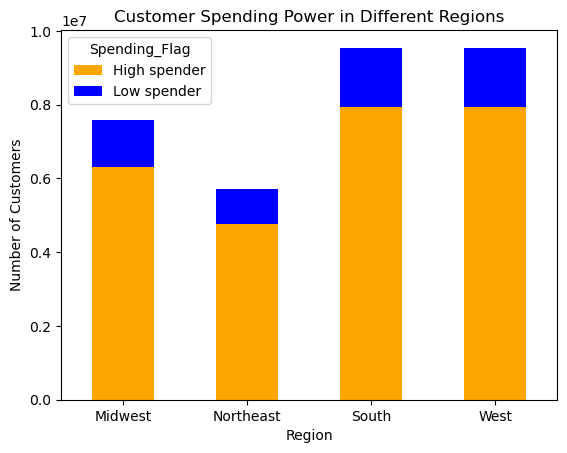

In [11]:
# Plot the data using a bar chart
colors = ['orange', 'blue']
bar_spender_region = df_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [12]:
path = r"C:\Users\charan.lalwani\Documents\cf\Achievement 4\Instacart basket analysis\Visualizations"

In [13]:
# Export the chart outside of Jupyter in the form of image file
bar_spender_region.figure.savefig(os.path.join(path, 'bar_spender_region.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

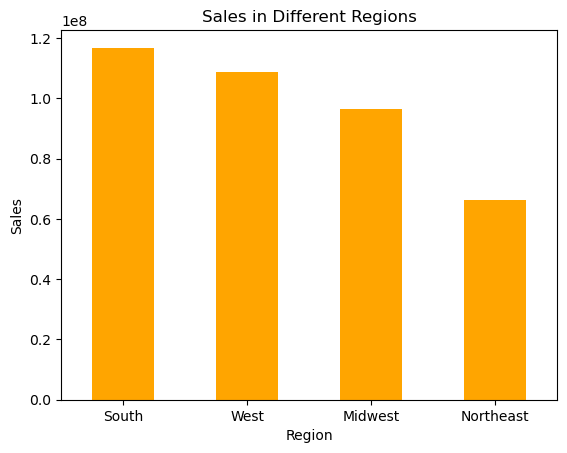

In [14]:
bar_sales_region = df_merged_large.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'orange')
plt.xticks(rotation = 0)

In [15]:
path = r"C:\Users\charan.lalwani\Documents\cf\Achievement 4\Instacart basket analysis\Visualizations"

In [16]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_region.figure.savefig(os.path.join(path,'bar_sales_region.png'))

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Creating a column 'order_count' to count the number of orders for each customer
df_merged_large['order_count'] = df_merged_large.groupby('user_id')['order_id'].transform('count')

In [18]:
# Creating an exclusion flag
df_merged_large['Exclusion_Flag'] = df_merged_large['order_count'] < 5

In [19]:
# Creating a subset by filtering out low-activity customers (order_count < 5)
df_subset = df_merged_large[df_merged_large['Exclusion_Flag'] == False].copy()

In [20]:
# Exporting the sample
df_subset.to_csv('high_activity_customers.csv', index=False)

In [21]:
df_merged_large.head()

,user_id,first_name,surname,Gender,state,age,date_joined,no.of dependants,marital_status,income,...,max_order,loyalty_flag,spenders,Spending_Flag,median_days_since_prior_order,order_frequency_flag,merge_flag,region,order_count,Exclusion_Flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest,18,False
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest,18,False
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest,18,False
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest,18,False
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,8,Low spender,19.0,Regular customer,both,Midwest,18,False


### ○ What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?


(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

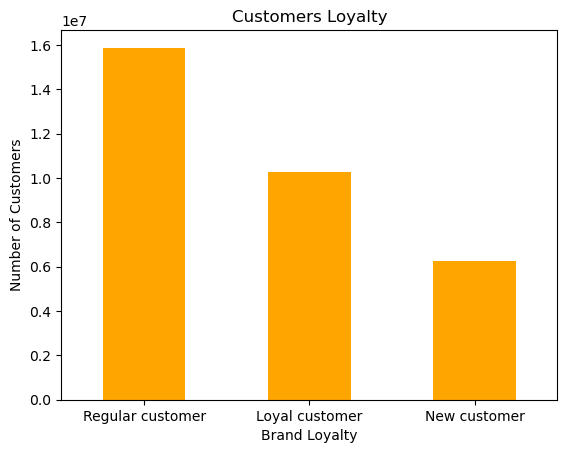

In [22]:
# Create a bar chart showing the number of orders regarding their brand loyalty
bar_orders_loyalty = df_merged_large['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'orange')
plt.xticks(rotation=0)

In [23]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_region.figure.savefig(os.path.join(path,'brand_loyalty.png'))

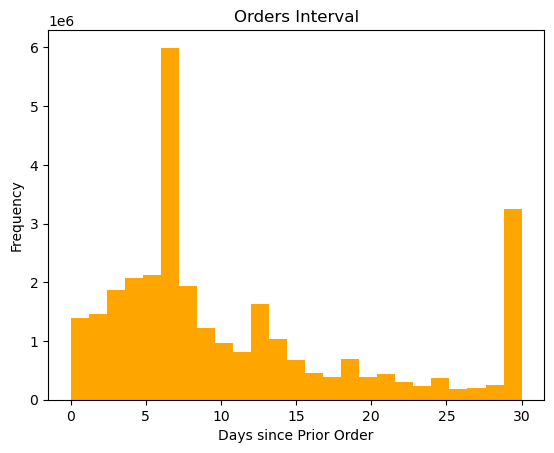

In [24]:
# Create a histogram to check how often do our customers return to Instacart?
hist_orders_interval = df_merged_large['days_since_prior_order'].plot.hist(bins=25, title='Orders Interval', xlabel='Days since Prior Order', color='orange')
plt.show()

In [25]:
# Export the chart outside of Jupyter in the form of image file
hist_orders_interval.figure.savefig(os.path.join(path, 'hist_order_interval.png'))

### ○ Are there differences in ordering habits based on a customer’s loyalty status?


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

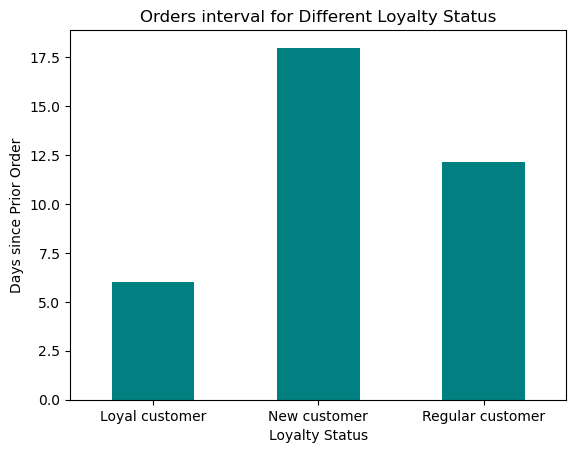

In [26]:
bar_orders_interval_loyalty = df_merged_large.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days since Prior Order', color = 'teal')
plt.xticks(rotation=0)

In [27]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_interval_loyalty.figure.savefig(os.path.join(path, 'bar_orders_interval_loyalty.png'))

In [127]:
df_merged_large.groupby('loyalty_flag')['order_dow'].value_counts()

loyalty_flag      order_dow
Loyal customer    1            1843401
                  0            1754731
                  5            1456715
                  2            1352343
                  6            1318366
                  4            1292042
                  3            1266495
New customer      0            1280451
                  1            1067446
                  6             895745
                  2             814412
                  5             759780
                  3             731417
                  4             694739
Regular customer  0            3169000
                  1            2749383
                  6            2282379
                  2            2047075
                  5            1989296
                  3            1842622
                  4            1797021
Name: count, dtype: int64

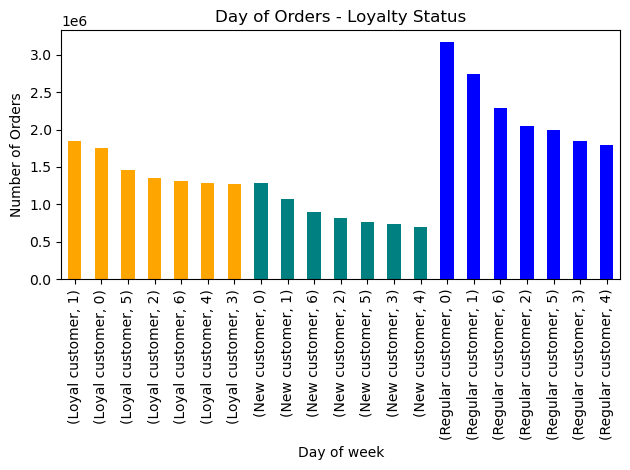

In [129]:
bar_dow_loyalty = df_merged_large.groupby('loyalty_flag')['order_dow'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['orange','orange','orange','orange','orange','orange','orange','teal','teal','teal','teal','teal','teal','teal', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [130]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_loyalty.figure.savefig(os.path.join(path, 'bar_dow_loyalty.png'))

### ○ Are there differences in ordering habits based on a customer’s region?


(array([0, 1, 2, 3]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'South'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

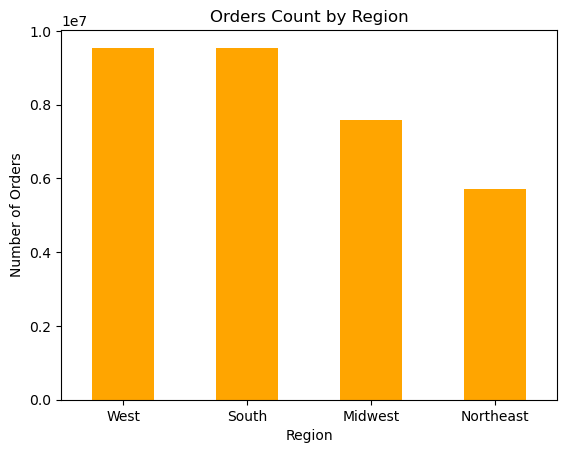

In [28]:
bar_orders_region = df_merged_large['region'].value_counts().plot.bar(title='Orders Count by Region', xlabel='Region', ylabel='Number of Orders', color='Orange')
plt.xticks(rotation=0)


In [29]:
#Export the chart outside of Jupyter in the form of image file
bar_orders_region.figure.savefig(os.path.join(path, 'Ordering_habits_based_on_region.png'))

### Is there a connection between age and family status in terms of ordering habits?

In [30]:
# Profile based on age groups
df_merged_large.loc[(df_merged_large['age'] >= 18) & (df_merged_large['age'] <= 30), 'age_flag'] = 'Young'
df_merged_large.loc[(df_merged_large['age'] > 30) & (df_merged_large['age'] <= 45), 'age_flag'] = 'Middle Aged'
df_merged_large.loc[(df_merged_large['age'] > 45) & (df_merged_large['age'] <= 60), 'age_flag'] = 'Older Adult'
df_merged_large.loc[(df_merged_large['age'] > 60), 'age_flag'] = 'Senior'

In [31]:
# Create a dataframe to group the data by 'fam_status' and 'age_flag'
df_grouped_fam_age = df_merged_large.groupby(['marital_status', 'age_flag']).size().unstack()

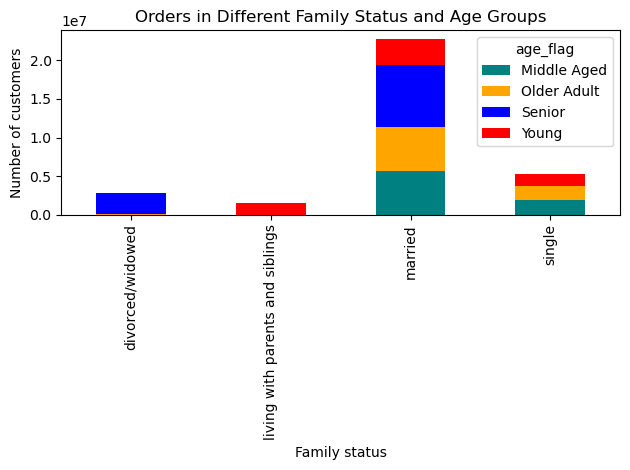

In [125]:
# Plot the data using a bar chart
colors = ['teal', 'orange', 'blue','red']
bar_fam_age = df_grouped_fam_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Family status')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

In [33]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age.figure.savefig(os.path.join(path,'bar_fam_age.png'))

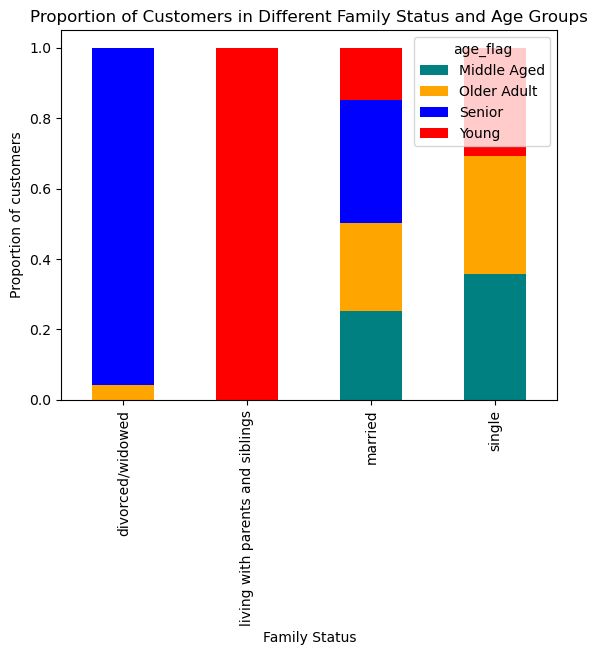

In [126]:
# To analyze the proportions 
df_prop_grouped_fam_age = df_grouped_fam_age.div(df_grouped_fam_age.sum(axis = 1), axis = 0)
bar_fam_age_prop = df_prop_grouped_fam_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Customers in Different Family Status and Age Groups')
plt.xlabel('Family Status')
plt.ylabel('Proportion of customers')

plt.show()

In [35]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age_prop.figure.savefig(os.path.join(path, 'bar_fam_age_prop.png'))

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.


In [36]:
df_merged_large.loc[df_merged_large['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_merged_large.loc[(df_merged_large['prices'] <= 15) & (df_merged_large['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df_merged_large.loc[df_merged_large['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

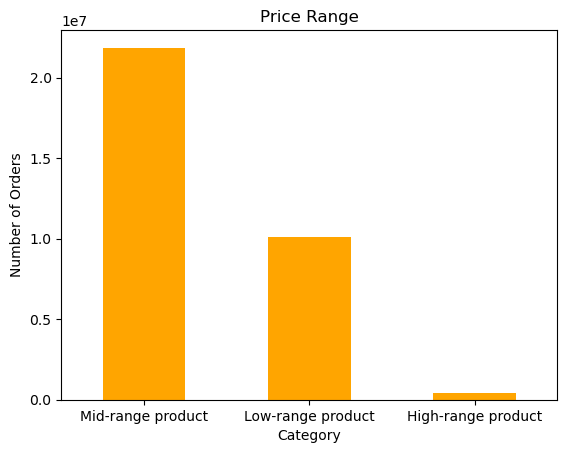

In [37]:
bar_price_range = df_merged_large['price_range_loc'].value_counts(dropna = False).plot.bar(title = 'Price Range', xlabel = 'Category', ylabel = 'Number of Orders', color = 'orange')
plt.xticks(rotation=0)

In [38]:
# Export the chart outside of Jupyter in the form of image file
bar_price_range.figure.savefig(os.path.join(path, 'bar_price_range.png'))

### Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [39]:
# create a column called 'result' to indicate department name
result = []

for value in df_merged_large["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [40]:
df_merged_large['department_name'] = result

In [41]:
df_merged_large['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alchol              153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [42]:
df_merged_large['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

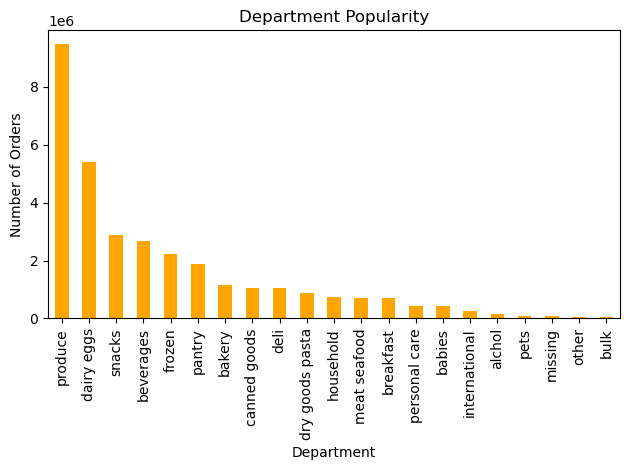

In [43]:
bar_depart_pop = df_merged_large['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = 'orange')
plt.tight_layout()

### Are there differences in ordering habits based on a customer’s region?

### ordering habit - days_since_prior_order( order interval) - Region

In [44]:
df_merged_large.groupby('region')['days_since_prior_order'].mean()

region
Midwest      11.181836
Northeast    11.075769
South        11.107460
West         11.055819
Name: days_since_prior_order, dtype: float64

In [45]:
column_names = df_merged_large.columns
print(column_names)


Index(['user_id', 'first_name', 'surname', 'Gender', 'state', 'age',
       'date_joined', 'no.of dependants', 'marital_status', 'income',
       'order_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_indicator', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spenders', 'Spending_Flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'merge_flag', 'region', 'order_count',
       'Exclusion_Flag', 'age_flag', 'price_range_loc', 'department_name'],
      dtype='object')


### Ordering habit- Price of orders

In [46]:
df_merged_large.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715483  1.0  99999.0
Northeast  11.554997  1.0  99999.0
South      12.242415  1.0  99999.0
West       11.387752  1.0  99999.0

### ordering habit - which days of the week had most orders (Region-wise)?¶

In [47]:
df_merged_large.groupby('region')['order_dow'].value_counts()

region     order_dow
Midwest    0            1460186
           1            1320759
           6            1058124
           2             991770
           5             983262
           3             895093
           4             888131
Northeast  0            1097258
           1             999953
           6             787283
           5             746455
           2             746153
           3             679308
           4             666326
South      0            1811727
           1            1674164
           6            1322347
           2            1241549
           5            1237259
           3            1139378
           4            1115012
West       0            1835011
           1            1665354
           6            1328736
           5            1238815
           2            1234358
           3            1126755
           4            1114333
Name: count, dtype: int64

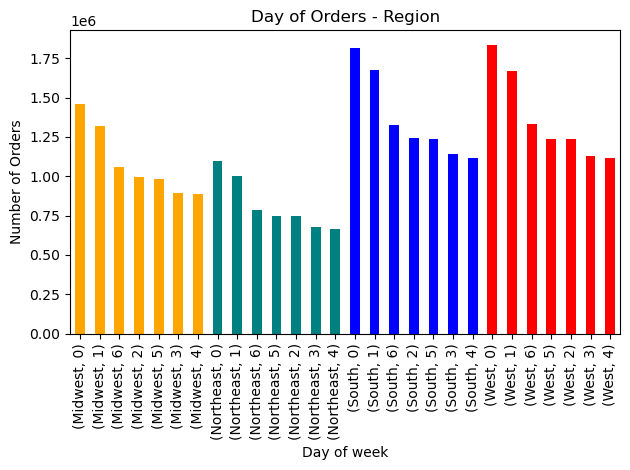

In [48]:
bar_dow_region = df_merged_large.groupby('region')['order_dow'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['Orange','Orange','Orange','Orange','Orange','Orange','Orange','teal','teal','teal','teal','teal','teal','teal','blue','blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red'])
plt.tight_layout()

In [49]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_region.figure.savefig(os.path.join(path, 'bar_dow_region.png'))

### ordering habit - what time of the day had most orders (region-wise)?

### The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [50]:
# Create a dataframe of order_hour_of_day of different regions
df_order_hour_region = df_merged_large.groupby('region')['order_hour_of_day'].value_counts()

In [51]:
# Check the bottom 3 ordering hours of Midwest
df_order_hour_region['Midwest'].tail(3)

order_hour_of_day
2    16987
4    12690
3    11909
Name: count, dtype: int64

In [52]:
# Check the bottom 3 ordering hours of Northeast
df_order_hour_region['Northeast'].tail(3)

order_hour_of_day
2    12436
4     9507
3     9218
Name: count, dtype: int64

In [53]:
# Check the bottom 3 ordering hours of South
df_order_hour_region['South'].tail(3)

order_hour_of_day
2    19430
4    15952
3    15514
Name: count, dtype: int64

In [54]:
# Check the bottom 3 ordering hours of West
df_order_hour_region['West'].tail(3)

order_hour_of_day
2    20522
4    15093
3    14640
Name: count, dtype: int64

### Is there a connection between age and family status in terms of ordering habits?

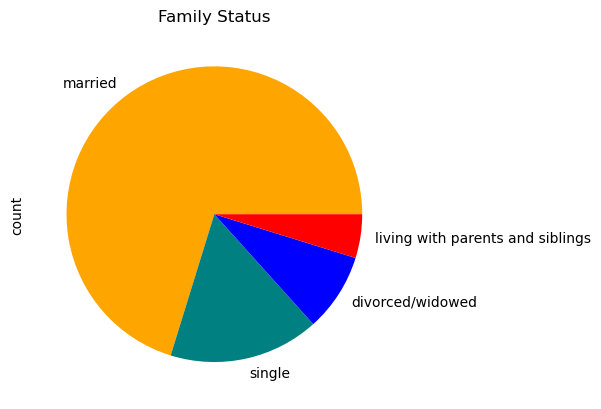

In [55]:
pie_fam_status =df_merged_large['marital_status'].value_counts().plot.pie(title = 'Family Status', colors = ['orange', 'teal', 'blue', 'red'])

In [56]:
# Export the chart outside of Jupyter in the form of image file
pie_fam_status.figure.savefig(os.path.join(path, 'pie_fam_status.png'))

### whether there are particular times of the day when peoplespend the most money, as this might inform the type of products they advertise at these times.

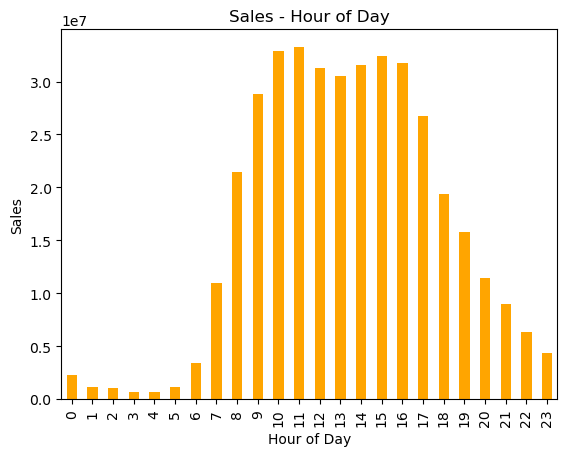

In [57]:
bar_sales_hr_of_day = df_merged_large.groupby('order_hour_of_day')['prices'].sum().plot.bar(title = 'Sales - Hour of Day', xlabel = 'Hour of Day', ylabel = 'Sales', color = 'orange')

In [58]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_hr_of_day.figure.savefig(os.path.join(path, 'bar_sales_hr_of_day.png'))

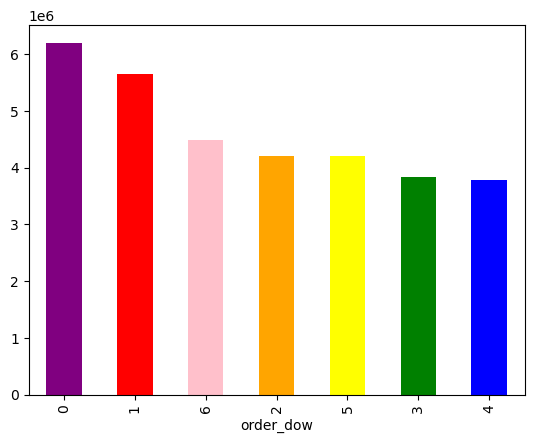

In [59]:
bar=df_merged_large['order_dow'].value_counts().plot.bar(color= ['purple', 'red' , 'pink' ,'orange' ,'yellow' ,'green' , 'blue'])

### Question 5 & Question 6: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status? & What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

### Income

In [60]:
# Create a flag indicating different groups of income
df_merged_large['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [61]:
# Create a new column with avg_income
df_merged_large['avg_income'] = df_merged_large.groupby(['user_id'])['income'].transform('mean')

In [62]:
# Create the flag based on the criteria
df_merged_large.loc[df_merged_large['avg_income'] > 128000, 'income_flag'] = 'High income'
df_merged_large.loc[(df_merged_large['avg_income'] <= 128000) & (df_merged_large['avg_income'] > 67000), 'income_flag'] = 'Middle income'
df_merged_large.loc[df_merged_large['avg_income'] <= 67000, 'income_flag'] = 'Low income'

In [63]:
df_merged_large['income_flag'].value_counts(dropna = False)

income_flag
Middle income    16221856
Low income        8100799
High income       8082204
Name: count, dtype: int64

In [65]:
df_merged_large.groupby('income_flag')['prices'].mean()

income_flag
High income      22.076865
Low income        7.291474
Middle income     9.291232
Name: prices, dtype: float64

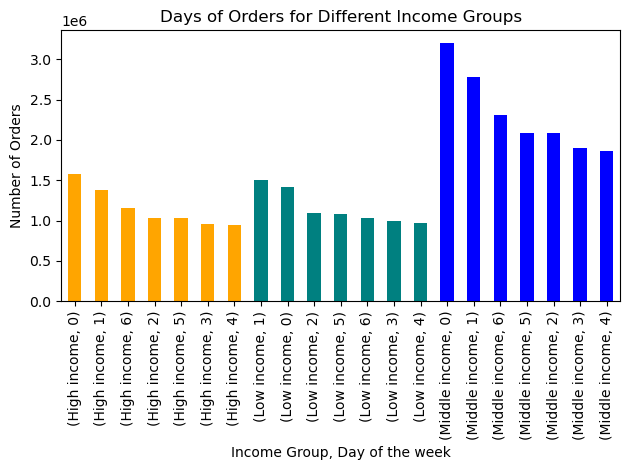

In [68]:
bar_orders_income = df_merged_large.groupby('income_flag')['order_dow'].value_counts().plot.bar(title = 'Days of Orders for Different Income Groups', xlabel = 'Income Group, Day of the week', ylabel = 'Number of Orders', color = ['orange','orange','orange','orange','orange','orange','orange','teal','teal','teal','teal','teal','teal','teal','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [69]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_income.figure.savefig(os.path.join(path, 'bar_orders_income.png'))

### Number of dependants

In [70]:
# Create a dependant_flag to indicate whether the customers have dependants or not
df_merged_large['avg_dependant'] = df_merged_large.groupby(['user_id'])['no.of dependants'].transform('mean')

In [74]:
df_merged_large.loc[df_merged_large['avg_dependant'] > 0, 'dependant_flag'] = 'With Dependants'
df_merged_large.loc[df_merged_large['avg_dependant'] <= 0, 'dependant_flag'] = 'Without Dependants'

### Creating customer profile based on age flag, income flag and dependant flag

In [75]:
df_merged_large['customer_profile'] = df_merged_large['age_flag'] + '_' + df_merged_large['income_flag'] + '_' + df_merged_large['dependant_flag'] 

In [76]:
customer_profile_prices_sum = df_merged_large.groupby('customer_profile')['prices'].sum()

In [77]:
customer_profile_prices_sum_sorted = customer_profile_prices_sum.sort_values(ascending=False)

In [81]:
gradient_colors = plt.cm.Oranges(np.linspace(0.8, 0.3, len(customer_profile_prices_sum_sorted)))

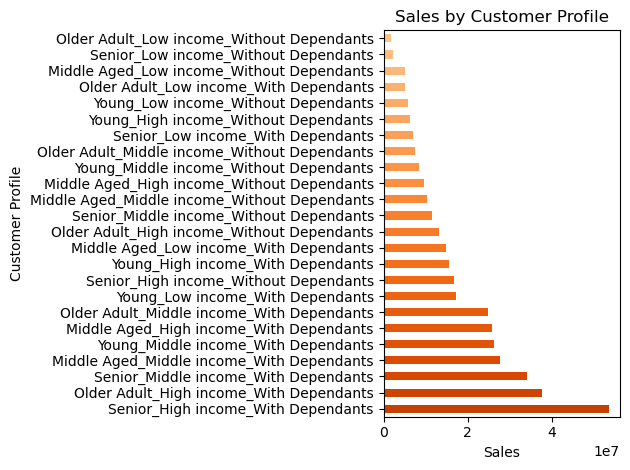

In [82]:
bar_customer_profile_sales = customer_profile_prices_sum_sorted.plot.barh(title = 'Sales by Customer Profile', xlabel = 'Sales', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [83]:
# Export the chart outside of Jupyter in the form of image file
bar_customer_profile_sales.figure.savefig(os.path.join(path, 'bar_customer_profile_sales.png'))

### Customer profile-order interval

In [85]:
# Orders interval
customer_profile_ord_int_mean = df_merged_large.groupby('customer_profile')['days_since_prior_order'].mean()

In [86]:
customer_profile_ord_int_mean_sorted = customer_profile_ord_int_mean.sort_values(ascending=True)

In [88]:
gradient_colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(customer_profile_ord_int_mean_sorted)))

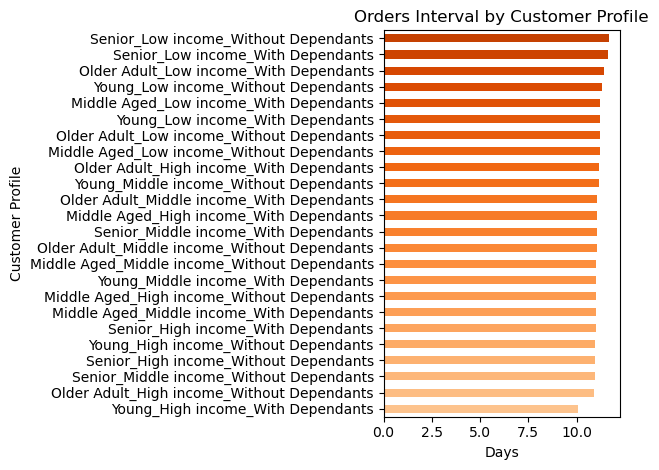

In [89]:
bar_customer_profile_orders_interval = customer_profile_ord_int_mean_sorted.plot.barh(title = 'Orders Interval by Customer Profile', xlabel = 'Days', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [90]:
# Export the chart outside of Jupyter in the form of image file
bar_customer_profile_orders_interval.figure.savefig(os.path.join(path, 'bar_customer_profile_orders_interval.png'))

#### Customers with dependants, especially those with high and middle income, consistently demonstrated high sales across various age groups. To better understand their preferences, further investigation into these customers' favorite departments is recommended.

In [132]:
# Export the final file
path=r"C:\Users\charan.lalwani\Documents\cf\Achievement 4\Instacart basket analysis\02 Data\Prepared data"


In [133]:
df_merged_large.to_pickle(os.path.join(path, 'df_merged_large_final.pkl'))